# Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

*NB. Строго говоря, согласно структуре таблицы, "одна строка" -- это не "один клиент", а "один контакт". Уверен, что именно это и имелось в виду, т.к. если мы предсказываем вероятность отклика, нам нужна именно такая таблица. (ЦЖ)* 

In [4]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Данные
### Получаем список файлов

In [5]:
url = "https://github.com/aiedu-courses/stepik_linear_models/tree/main/datasets"

r = requests.get(url)
csv_list = str(r.text)
csv_list = csv_list.split('"')
csv_list = [i for i in csv_list if '.csv' in i and 'dataset' not in i]

for i in csv_list:
    print(i)

D_clients.csv
D_close_loan.csv
D_job.csv
D_last_credit.csv
D_loan.csv
D_pens.csv
D_salary.csv
D_target.csv
D_work.csv


### Читаем данные из файлов в датафреймы

In [6]:
url_raw = "https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/"

dataframes = {}

for file in csv_list:    
 # Создание имени датафрейма с приставкой "df_"
    dataframe_name = f"df_{file.replace('.csv', '').replace('D_', '')}"
    # Чтение файла CSV в датафрейм
    file_path = ''.join([url_raw, file])
    df_temp = pd.read_csv(file_path)
    df_temp = df_temp.drop_duplicates()
    dataframes[dataframe_name] = df_temp

# Вывод созданных датафреймов
for dataframe_name, dataframe in dataframes.items():
    print(f"Название датафрейма: {dataframe_name}")
    print(dataframe.head(3))
    print()

Название датафрейма: df_clients
          ID  AGE  GENDER            EDUCATION      MARITAL_STATUS  \
0  106805103   42       1              Среднее  Не состоял в браке   
1  106809308   28       1  Среднее специальное      Состою в браке   
2  106805867   64       0  Среднее специальное      Состою в браке   

   CHILD_TOTAL  DEPENDANTS  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
0            1           0                  1                  0   
1            1           1                  1                  0   
2            2           0                  1                  1   

  REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE  \
0   Московская область    Московская область      Московская область   
1    Читинская область     Читинская область       Читинская область   
2    Иркутская область     Иркутская область       Иркутская область   

   FL_PRESENCE_FL  OWN_AUTO  
0               1         0  
1               0         0  
2               0         1  

Назв

In [7]:
# Собираем итоговый датафрейм 
df_fin = pd.DataFrame()
df_fin[['AGREEMENT_RK', 'ID_CLIENT', 'TARGET']] = dataframes['df_target'][['AGREEMENT_RK', 'ID_CLIENT', 'TARGET']]
df_fin = df_fin.merge(dataframes['df_clients'], how='left', left_on='ID_CLIENT', right_on='ID')

print(df_fin.columns)  # посмотрим глазами 

# Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'ID', 'AGE', 'GENDER',
#        'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
#        'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE',
#        'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL',
#        'OWN_AUTO'],
#       dtype='object')

Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'ID', 'AGE', 'GENDER',
       'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE',
       'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL',
       'OWN_AUTO'],
      dtype='object')


In [8]:
# Продолжаем сбор финального датафрейма
df_fin = df_fin[['AGREEMENT_RK', 'TARGET', 'ID_CLIENT', 'AGE', 
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
       'CHILD_TOTAL', 'DEPENDANTS']]
df_fin = df_fin.merge(dataframes['df_salary'], how='left', left_on='ID_CLIENT', right_on='ID_CLIENT')

# Промежуточный датафрейм с займами
df_loans = pd.merge(dataframes['df_loan'], dataframes['df_close_loan'], how='left', left_on='ID_LOAN', right_on='ID_LOAN')

# Второй промежуточный датафрейм: соединяем клиентов с займами
merged_df = df_fin.merge(df_loans, how='left', left_on='ID_CLIENT', right_on='ID_CLIENT')
# Подсчитываем общее количество займов
merged_df['LOAN_NUM_TOTAL'] = merged_df.groupby('ID_CLIENT')['ID_LOAN'].transform('count')
# Подсчитываем количество закрытых займов
merged_df['LOAN_NUM_CLOSED'] = merged_df.groupby('ID_CLIENT')['CLOSED_FL'].transform('sum')

# Сборка
df_fin = df_fin.merge(merged_df[['ID_CLIENT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']], on='ID_CLIENT')
df_fin = df_fin[['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']]
print(df_fin.columns)  # посмотрим глазами 

# Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
#        'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
#        'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED'],
#       dtype='object')

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED'],
      dtype='object')


In [9]:
del dataframes

*NB. По идее, здесь надо перезагрузить тетрадку, чтобы не морочиться с удалением переменных из памяти. Не знаю, насколько это хорошая практика.* 

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построены графики распределений числовых признаков (не менее, чем по двум признакам)
* построена матрица корреляций
* построены графиков зависимостей целевой переменной и признаков (не менее, чем два графика)
* вычислены числовые характеристики распределения числовых столбцов (среднее, min, max, медиана и так далее)
* вычислены числовые характеристики категориальных столбцов
* отображено число пропусков, дубликатов в данных
* сделаны дополнительные исследования

In [10]:
df = df_fin

df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,0,1,2,1,5000.0,1,1
1,59910230,0,32,1,0,1,3,3,12000.0,1,1
2,59910525,0,52,1,0,1,4,0,9000.0,2,1
3,59910525,0,52,1,0,1,4,0,9000.0,2,1
4,59910803,0,39,1,0,1,1,1,25000.0,1,1


### Количество дубликатов и пропусков

In [11]:
len(df) - len(df.drop_duplicates())

5903

In [13]:
len(df) - len(df.dropna())

0

In [14]:
df.drop_duplicates(inplace=True)

### Распределение отклика и возраста


C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение отклика')

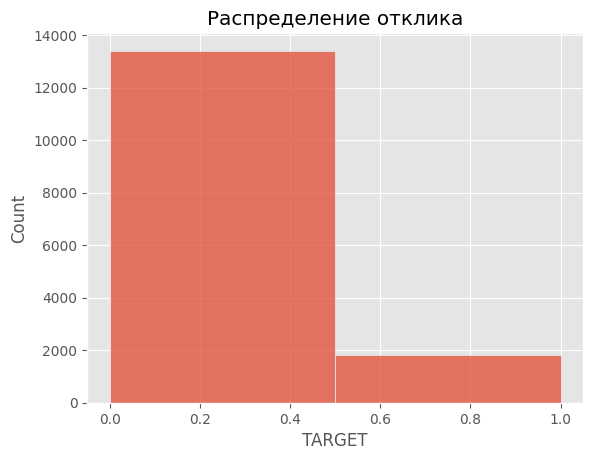

In [15]:
fig, ax = plt.subplots()
sns.histplot(df, x='TARGET', bins=2, ax=ax)
ax.set_title(label='Распределение отклика')

C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0.5, 1.0, 'Распределение количества кредитов')

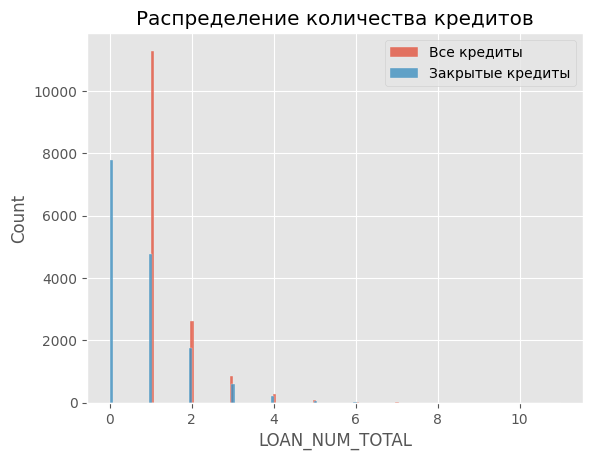

In [16]:
fig, ax = plt.subplots()
sns.histplot(df['LOAN_NUM_TOTAL'], ax=ax, label='Все кредиты')
sns.histplot(df['LOAN_NUM_CLOSED'], ax=ax, label='Закрытые кредиты')
ax.legend()

ax.set_title(label='Распределение количества кредитов')

<Axes: title={'center': 'Возраст'}>

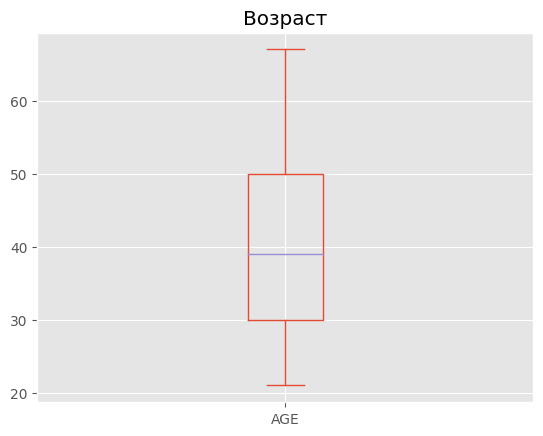

In [17]:
df['AGE'].plot(kind='box', title='Возраст')

<Axes: title={'center': 'Возраст'}, ylabel='Frequency'>

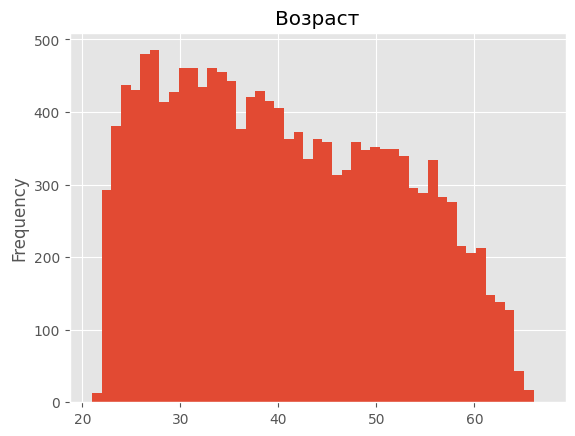

In [18]:
df['AGE'].plot(kind='hist', bins=df['AGE'].max() - df['AGE'].min() + 1, title='Возраст')

Text(0.5, 1.0, 'Матрица корреляций')

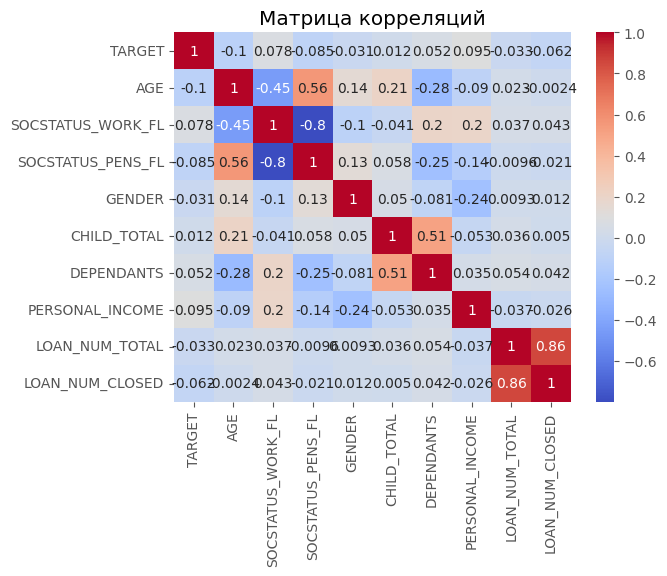

In [19]:
corr_matrix = df[['TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']].corr()

fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

ax.set_title(label='Матрица корреляций')

### Визуализация соотношений некоторых признаков с целевой переменной

Text(0.5, 1.0, 'Возраст / Отклик')

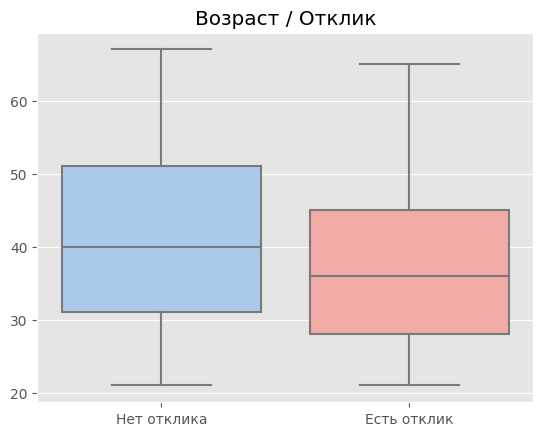

In [20]:
fig, ax = plt.subplots()
sns.boxplot(data=[df[df['TARGET'] == 0]['AGE'], df[df['TARGET'] == 1]['AGE']], palette=['#a1c9f4', '#ff9f9b'], ax=ax)
ax.set_xticklabels(labels=['Нет отклика', 'Есть отклик'])
ax.set_title(label='Возраст / Отклик')

C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SOCIOCENTER\.conda\envs\stepik\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

Text(0.5, 1.0, 'Личный доход / Отклик')

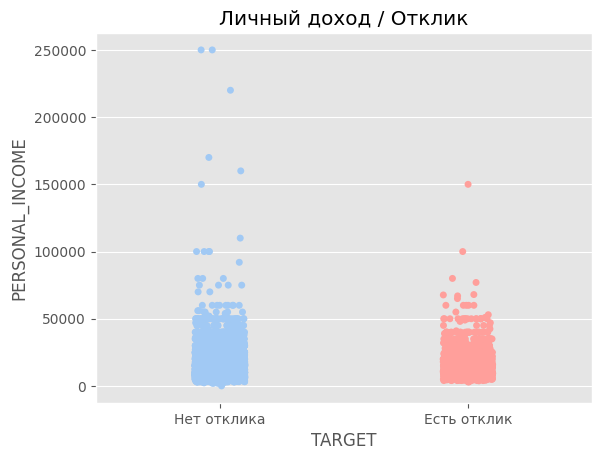

In [21]:
fig, ax = plt.subplots()
sns.stripplot(x = "TARGET", y = "PERSONAL_INCOME", data = df, palette=['#a1c9f4', '#ff9f9b'])
ax.set_xticklabels(labels=['Нет отклика', 'Есть отклик'])
ax.set_title(label='Личный доход / Отклик')

### Статистики некоторых признаков

In [22]:
df_stat = df[['AGE', 'PERSONAL_INCOME', 'DEPENDANTS']].describe()[1:].T[['mean', 'min', 'max', '50%', 'std']]
df_stat['mean'] = df_stat['mean'].round()
df_stat['std'] = df_stat['std'].round(2)

df_stat.rename(columns={'mean':'Среднее', 'min':'Минимум', 'max':'Максимум', '50%':'Медиана', 'std':'Ст. отклонение'}, 
               index={'AGE':'Возраст', 'PERSONAL_INCOME':'Личный доход', 'DEPENDANTS':'Иждивенцы'}, 
               inplace=True)

df_stat

,Среднее,Минимум,Максимум,Медиана,Ст. отклонение
Возраст,40.0,21.0,67.0,39.0,11.60
Личный доход,13854.0,24.0,250000.0,12000.0,9015.47
Иждивенцы,1.0,0.0,7.0,0.0,0.81
